In [1]:
"""Import functions from meg_decoding and set up dimensions of data to simulate"""

'Import functions from meg_decoding and set up dimensions of data to simulate'

In [1]:
from __future__ import division
from meg_decoding import *

# Example usage:

# make an empty epochs object to populate
data_path = sample.data_path()
path_to_raw = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
dummy_raw = mne.io.Raw( path_to_raw, preload=True )
file_info = dummy_raw.info

# set up dimenions of simulated data
n_trials = 1000
n_sensors = dummy_raw.info['nchan']
times = np.round(np.arange(-0.1,0.5,0.005),decimals=3)
n_timepoints = len(times)
snr = 2

Opening raw data file /Users/lauragwilliams/Documents/programming/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [2]:
"""Create simulated data"""

'Create simulated data'

In [3]:
# create a y variable to predict
y = np.random.randint(low=-1000,high=1000,size=n_trials)/1000.

# simulate MEG data
data_array = np.random.randint(low=-1000,high=1000,size=(n_trials, n_sensors, n_timepoints))/1000

# loop through trials from 100-200 ms and inject stimulus response
idx_tmin = np.nonzero(0.1 == times)[0][0]
idx_tmax = np.nonzero(0.2 == times)[0][0]

# find location of MEG sensors and add signal to first 100
sensor_indx = np.arange(0,100)

for ms_response in np.arange(idx_tmin, idx_tmax+1):
    
    # and do this for just half of the sensors:
    for sensor in sensor_indx:
        
        # add true responses over the noise
        data_array[:,sensor,ms_response] = data_array[:,sensor,ms_response] + y*snr

# transform data array into MNE Epochs object
tstart = -0.1 # time within epoch to run analysis (min)
tstop = 0.3 # time within epoch to run analysis (max)
epochs = nparray_to_MNE_epoch(data_array, times, tstart, tstop)
epochs.info = file_info
evoked = epochs.average()

Opening raw data file /Users/lauragwilliams/Documents/programming/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
319 events found
Events id: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 72 events and 61 original time points ...
0 bad epochs dropped


In [4]:
"""Decode y from X"""

'Decode y from X'

In [5]:
# decode y from epochs
ld = decode_MEG(epochs, y, 'continuous', decoder=TimeDecoding, scorer=scorer_spearman)

[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    4.9s remaining:   -1.0s
[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    5.2s remaining:   -1.0s
[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    5.5s remaining:   -1.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=4)]: Done   5 out of   4 | elapsed:    0.1s remaining:   -0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


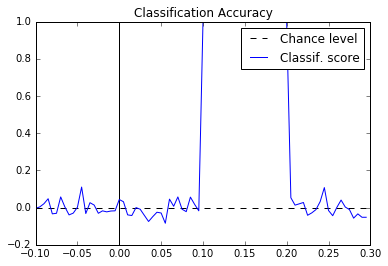

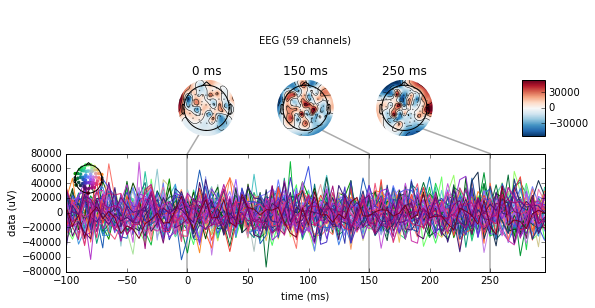

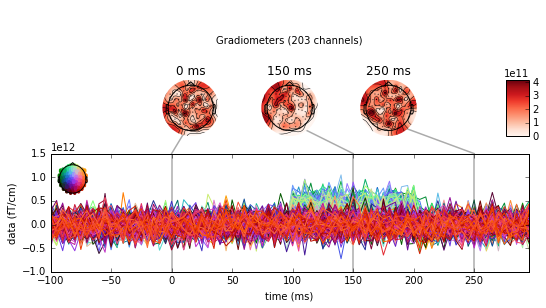

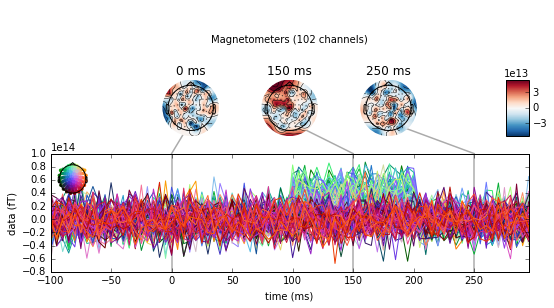

In [6]:
# plot result
%matplotlib inline
ld.plot(chance=0, title='Classification Accuracy', xlabel='Time (ms)', ylabel='Spearmans R', ymax=1.2)

# plot evoked brain response
evoked.plot_joint(times=[0,0.15,0.25])